<a href="https://colab.research.google.com/github/oluwamayowaa/twitter-sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install tweepy
!pip install wordcloud
! pip install requests
!pip install geopy
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.7 MB/s 
     |████████████████████████████████| 7.6 MB 40.0 MB/s 
     |████████████████████████████████| 163 kB 67.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.6 MB/s 


## Imports

In [2]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import torch
import requests
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from geopy.geocoders import Nominatim

## API Credentials

Authenticating the tweepy API with personal consumer key and secret.

In [4]:
# Handling authentication with twitter via OAuthHandler

auth = OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit= True)

In [5]:
# Search keyword
keyword = '@Airbnb'
# Filtering the keyword to remove retweets
keyword = keyword + '-filter:retweets'

In [6]:
# number of tweets we are requesting for
max_tweets = 3000
# date_since = '2022-01-01' # we would be choosing tweets from 2022/01/01

In [7]:
# Creating a cursor object to scrap tweets using the twitter API

tweets = tweepy.Cursor(api.search,
                       q= keyword, lang = 'en',
                       tweet_mode = 'extended',
                       result_type = 'recent').items(max_tweets)

In [8]:
# Creating a list of tweets, handles, user locations and verification status

tweet_list = [[tweet.user.screen_name, tweet.full_text, tweet.user.location, tweet.coordinates] for tweet in tweets]

In [9]:
# Converting tweets into a dataframe

df = pd.DataFrame(data = tweet_list, columns = ['user', 'tweet', 'location', 'coordinates'])

In [10]:
# Saving the dataframe as a CSV file:

df.to_csv('airbnb.csv')

### Exploring the dataset

In [11]:
air_df = df.copy()
air_df.head()

,user,tweet,location,coordinates
0,chrispics,last month a host on #Airbnb threatened me for...,Roaming the Earth,None
1,HOMESvsHOTELS,"Another weekend, another group of guests party...",ATX,None
2,dch1309,I bet can’t Elon buy @Airbnb 🙏🏻📿👀,"Denver, CO",None
3,DakotaLeRoy,If anyone’s hiring a mid-senior level product ...,"New York, NY",None
4,Airisaiia,@senorniggy1256 @Airbnb Sorry to hear another ...,Scotland,None


In [12]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user         2164 non-null   object
 1   tweet        2164 non-null   object
 2   location     2164 non-null   object
 3   coordinates  2 non-null      object
dtypes: object(4)
memory usage: 67.8+ KB


More than 99% of the coordinates feature are empty, so the coordinates feature would be dropped.

In [13]:
air_df.drop(columns = ['coordinates'], inplace = True)

### Checking Duplicates

Checking for duplicate tweets in the dataset

In [14]:
air_df.duplicated().sum()

35

There are 35 duplicate samples in the dataframe.

In [15]:
air_df[air_df.duplicated()]

,user,tweet,location
548,Lutatium,@AirbnbHelp @Airbnb @AirbnbHelp Two years ago ...,"Los Angeles, CA"
595,jokermean,"@Airbnb 8 weeks ago, AirBnb altered our listin...","Hollywood, CA"
610,xxxx58567934,@Airbnb I booked an apartment and paid the amo...,
627,MarissaYongJie,@Santiag19100930 @Earl_GreyT @Airbnb @AirbnbHe...,
692,PrinceOlasco6,@Airbnb @Airbnb_uk Get your property promoted ...,
1059,Samuel30363,@Airbnb Are you looking for how to do Airbnb p...,nigeria
1060,Samuel30363,@Airbnb Are you looking for how to do Airbnb p...,nigeria
1062,Samuel30363,@Airbnb Are you looking for how to do Airbnb p...,nigeria
1063,Samuel30363,@Airbnb Are you looking for how to do Airbnb p...,nigeria
1064,Samuel30363,@Airbnb Are you looking for how to do Airbnb p...,nigeria


### Dropping duplicates

In [16]:
air_df.drop_duplicates(inplace = True)

### Checking for missing values in the dataset

In [17]:
air_df.isna().sum()

user        0
tweet       0
location    0
dtype: int64

There are no missing data features in the dataframe

## Preprocessing text data

In [18]:
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [19]:
# Creating a function to clean the tweets

def clean_tweet(tweet):
    tweet = tweet.lower() # makes all characters in tweets to be lowercase
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = re.sub(" ' ", '', tweet) # remove contractions
    tweet = re.sub('@[A-Za-z0-9]+', '', tweet) # removes mentions
    tweet = re.sub('#[A-Za-z0-9]+', '', tweet) # removes all hashtags
    tweet = re.sub('http\S+', '', tweet) # removes all hyperlinks
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)
    tweet = re.sub("[^a-z0-9]"," ", tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = emoji_pattern.sub('', tweet) # Removing emoji patterns
    return tweet

air_df['clean_tweet'] = air_df['tweet'].apply(clean_tweet)

In [20]:
air_df.head()

,user,tweet,location,clean_tweet
0,chrispics,last month a host on #Airbnb threatened me for...,Roaming the Earth,last month a host on threatened me for leavin...
1,HOMESvsHOTELS,"Another weekend, another group of guests party...",ATX,another weekend another group of guests party...
2,dch1309,I bet can’t Elon buy @Airbnb 🙏🏻📿👀,"Denver, CO",i bet can t elon buy
3,DakotaLeRoy,If anyone’s hiring a mid-senior level product ...,"New York, NY",if anyone s hiring a mid senior level product ...
4,Airisaiia,@senorniggy1256 @Airbnb Sorry to hear another ...,Scotland,sorry to hear another person burned by airbn...


In [21]:
# saving cleaned tweets to a csv file

air_df.to_csv('clean_df.csv')

### Loading model and tokenizer from the hugging face hub

In [22]:
# importing tokenizer and transformers from the hugging face hub

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoConfig

checkpoint = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
config =  AutoConfig.from_pretrained(checkpoint)

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
from scipy.special import softmax

In [24]:
''' Helper function to encode text and determine sentiment polarity'''

def sentiment_score(tweet):
    tokens = tokenizer.encode(tweet, padding = True, return_tensors = 'pt')
    output = model(tokens)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return np.argmax(scores)

In [25]:
air_df['sentiment_score'] = air_df['clean_tweet'].apply(sentiment_score)

In [26]:
def sentiment(score):
    if score == 0:
        return 'Negative'
    elif score == 1:
        return 'Neutral'
    elif score == 2:
        return 'Positive'

In [27]:
air_df['sentiment'] = air_df['sentiment_score'].apply(sentiment)

In [28]:
air_df.head()

,user,tweet,location,clean_tweet,sentiment_score,sentiment
0,chrispics,last month a host on #Airbnb threatened me for...,Roaming the Earth,last month a host on threatened me for leavin...,0,Negative
1,HOMESvsHOTELS,"Another weekend, another group of guests party...",ATX,another weekend another group of guests party...,1,Neutral
2,dch1309,I bet can’t Elon buy @Airbnb 🙏🏻📿👀,"Denver, CO",i bet can t elon buy,1,Neutral
3,DakotaLeRoy,If anyone’s hiring a mid-senior level product ...,"New York, NY",if anyone s hiring a mid senior level product ...,1,Neutral
4,Airisaiia,@senorniggy1256 @Airbnb Sorry to hear another ...,Scotland,sorry to hear another person burned by airbn...,0,Negative


In [29]:
sentiment_count = air_df.groupby(['sentiment']).size()
print(sentiment_count)

sentiment
Negative    976
Neutral     728
Positive    425
dtype: int64


Tweets mentioning the AirBNB official account are mostly negative, with only 425 being positive.

### Pie Chart of sentiments

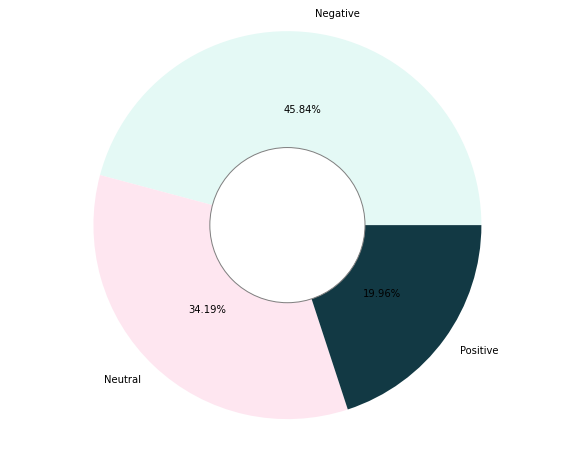

In [30]:
labels = sentiment_count.index
size = sentiment_count.values
colors = ['#e4f9f5', '#fee6f0', '#123944']
explode = (0, 0, 0)

plt.figure(figsize = (10, 8)) 

plt.pie(size, 
        explode = explode, 
        labels = labels, colors = colors, autopct = '%.2f%%')

centre_circle = plt.Circle((0,0), 0.4,color= 'grey', fc= 'white', linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.show()

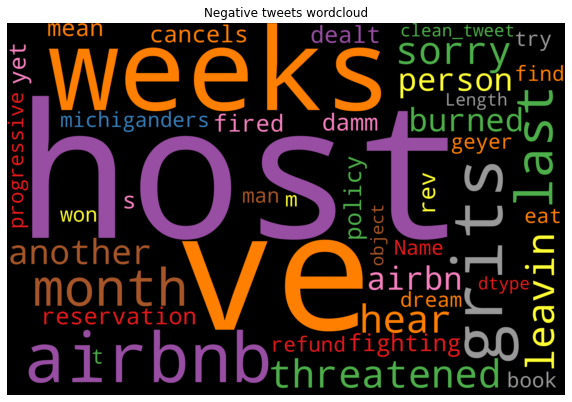

In [31]:
# Wordcloud of negative tweets

negative_tweets = air_df['clean_tweet'][air_df['sentiment'] == 'Negative']
stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(width = 3000,
                               height= 2000,
                               background_color = 'black', 
                               colormap = 'Set1',
                               stopwords = stop_words).generate(str(negative_tweets))

plt.figure(figsize = [10, 10])
plt.title('Negative tweets wordcloud')
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

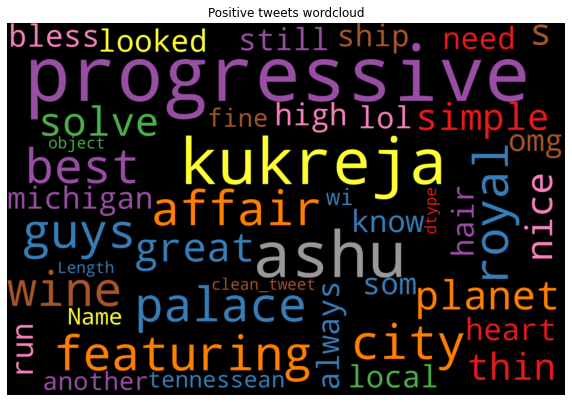

In [32]:
# Wordcloud of positive tweets

positive_tweets = air_df['clean_tweet'][air_df['sentiment'] == 'Positive']
stop_words = list(STOPWORDS)
positive_wordcloud = WordCloud(width = 3000,
                               height = 2000,
                               background_color = 'black',
                               colormap = 'Set1',
                               stopwords = stop_words).generate(str(positive_tweets))

plt.figure(figsize = [10, 10])
plt.title('Positive tweets wordcloud')
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()